# CIS242-Shark Tank KNN
Code to run KNN on "shark_tank_clean.csv"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import category_encoders as ce
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('shark_tank_data_clean.csv')

df.head()

,deal_True,category,askedfor,exchangeforstake,valuation,title,multEntr_True
0,0,Novelties,1000000,15,6666667,Ionic Ear,0
1,1,Specialty Food,460000,10,4600000,Mr. Tod's Pie Factory,0
2,1,Baby and Child Care,50000,15,333333,Ava the Elephant,0
3,0,Consumer Services,250000,25,1000000,College Foxes Packing Boxes,0
4,0,Consumer Services,1200000,10,12000000,Wispots,0


In [165]:
# defining features and target
X = df.drop(["deal_True", "title"], axis=1) # --> features
y = df["deal_True"] # --> target

# encoding the 'category' variable using LabelEncoder
le = LabelEncoder()
X["category_encoded"] = le.fit_transform(X["category"])

# dropping the original 'category' variable
X.drop("category", axis=1, inplace=True)

# scaling the numerical variables so that they have the same range
scaler = StandardScaler()
X[["askedfor", "exchangeforstake", "valuation"]] = scaler.fit_transform(
    X[["askedfor", "exchangeforstake", "valuation"]])

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

# instantiating the model with the optimal number of neighbors 
# which is the square root of the number of observations in the training set
knn = KNeighborsClassifier(n_neighbors=20, metric = 'euclidean')

# fitting the model
model = knn.fit(X_train, y_train)

# predicting on the test set
y_pred = knn.predict(X_test)

# predicting the probabilities on the test set
y_pred_proba = knn.predict_proba(X_test)

# calculating accuracy
print("Accuracy Score:" , knn.score(X_test, y_test))

Accuracy Score: 0.6161616161616161


<AxesSubplot:>

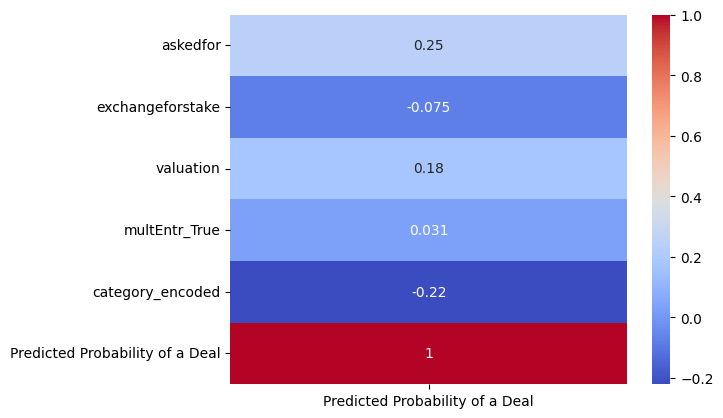

In [162]:
# creating a dataframe of the features and the predicted probabilities
heatmap_df = pd.concat([X_test, 
                        pd.Series(y_pred_proba[:, 1], 
                                  name='Predicted Probability of a Deal')], 
                                axis=1)

# calculating the correlation matrix
corr_matrix = heatmap_df.corr()

# plotting the heatmap
sns.heatmap(corr_matrix[['Predicted Probability of a Deal']], 
            annot=True, cmap='coolwarm')

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63        54
           1       0.57      0.62      0.60        45

    accuracy                           0.62        99
   macro avg       0.62      0.62      0.62        99
weighted avg       0.62      0.62      0.62        99



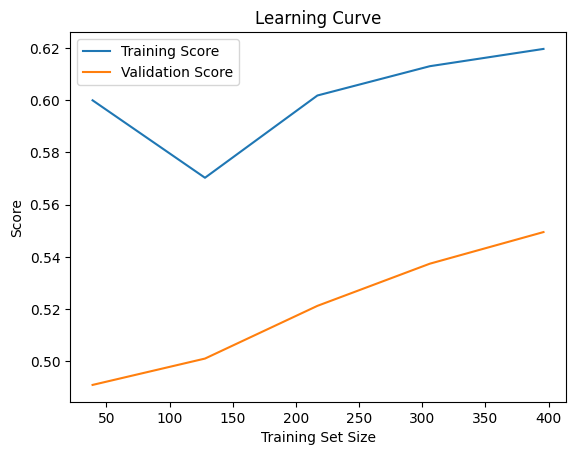

In [166]:
from sklearn.model_selection import learning_curve

# creating a learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plotting the learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), 
         label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 
         label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


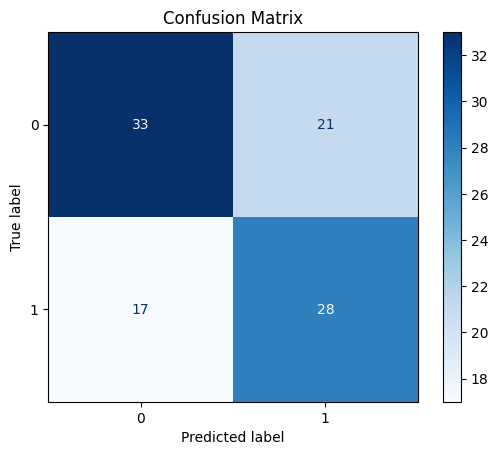

In [169]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()